<div style=" background-color: RGB(250, 5, 0);" >
<h1 style="margin: auto; padding: 20px 0; color:#000; text-align: center">Projet 9 - DATA ANALYSE</h1>
<h2 style="margin: auto; padding: 20px 0; color:#000; text-align: center">Analyse des donées pour la réalisation d'une étude de marché</h2>
<h3 style="margin: auto; padding: 20px 0; color:#000; text-align: center">DELCOURT Jade
</h3>
</div>

# Import des librairies et chargement des fichiers 

##### Import de librairies 

    Pandas pour analyser et manipuler les données,
    Numpy pour manipuler des tableaux et des fonctions mathématiques tableaux,
    Matplotlib pour créer des graphiques à partir des données,
    Searborn semblable à une sur couche de Matplotlib qui apport certain designs, 
    Sklearn pour le clustering des données,
    Scipy pour les calcules statistique. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D 


##### Chargement des fichiers CSV 

Chargement du fichier avec les donnée consolidé, dans le but de réaliser l'étude marché pour la poule qui chante.

In [2]:
data = pd.read_csv(r'C:\Users\dltja\OneDrive\Documents\DATA ANALYST\PROJETS\Projet 9 - Produisez une étude de marché avec R ou Python\data.csv')

# Vérification de l'import et nettoyage des fichiers

Vérification que l'import du fichier data c'est bien déroulé.

In [3]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       170 non-null    int64  
 1   pays             170 non-null    object 
 2   dispo_calories   170 non-null    float64
 3   dispo_proteines  170 non-null    float64
 4   population       170 non-null    float64
 5   pop_croissance   170 non-null    float64
 6   pib              170 non-null    float64
 7   politique        170 non-null    float64
 8   importation      170 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 12.1+ KB


,Unnamed: 0,pays,dispo_calories,dispo_proteines,population,pop_croissance,pib,politique,importation
0,0,Afrique du Sud,149.24,17.86,59893.885,1.279421,14322.3,-0.72,304.0
1,1,Albanie,85.67,10.27,2842.321,0.893244,17261.0,0.11,47.0
2,2,Algérie,23.14,2.77,44903.225,1.459099,13090.9,-0.74,0.0
3,3,Allemagne,60.85,7.69,83369.843,1.022295,62605.5,0.61,789.0
4,4,Angola,39.62,4.75,35588.987,2.170846,7407.1,-0.65,316.0
...,...,...,...,...,...,...,...,...,...
165,166,Équateur,108.60,12.99,18001.000,1.425652,13530.4,-0.24,1.0
166,167,États-Unis d'Amérique,198.23,24.52,338289.857,1.197916,71308.9,-0.04,191.0
167,168,Éthiopie,1.49,0.18,123379.924,1.840616,2698.6,-2.04,0.0
168,169,Îles Marshall,280.32,33.92,41.569,0.766616,6625.5,1.06,3.0


Je supprimme les données de l'Inde qui est un outlideur. J'ai fait mes analyses avec et sans pour vérifier s'il été intérésant pour notre choix finale. N'ayant pas d'intérêt j'ai choisie de le supprimé.
Je supprime ma colonne "Unnamed: 0", qui fait doublon avec l'index, et je stocke ma valeurs pays dans "pays".
J'affiche les dimention du dataframe ainsi que les différente information et un aperçu sur celui-ci.

In [4]:
data = data.drop(data.loc[data['pays'] == "Inde"].index)
pays = data['pays']
data = data.drop(['Unnamed: 0'], axis = 1)
data

,pays,dispo_calories,dispo_proteines,population,pop_croissance,pib,politique,importation
0,Afrique du Sud,149.24,17.86,59893.885,1.279421,14322.3,-0.72,304.0
1,Albanie,85.67,10.27,2842.321,0.893244,17261.0,0.11,47.0
2,Algérie,23.14,2.77,44903.225,1.459099,13090.9,-0.74,0.0
3,Allemagne,60.85,7.69,83369.843,1.022295,62605.5,0.61,789.0
4,Angola,39.62,4.75,35588.987,2.170846,7407.1,-0.65,316.0
...,...,...,...,...,...,...,...,...
165,Équateur,108.60,12.99,18001.000,1.425652,13530.4,-0.24,1.0
166,États-Unis d'Amérique,198.23,24.52,338289.857,1.197916,71308.9,-0.04,191.0
167,Éthiopie,1.49,0.18,123379.924,1.840616,2698.6,-2.04,0.0
168,Îles Marshall,280.32,33.92,41.569,0.766616,6625.5,1.06,3.0


# Analyses des données

### Normalisation 

On normalise les données afin d'avoir une analyse la plus fidèle possible, en étant sur la même échelle. 
Je transformation mon dataframe en array Numpy. Je réalise également une indexation selon les pays par la fonction .set_index()

In [5]:
data.set_index('pays', inplace=True)

X = data.values
X.shape

(169, 7)

Je centre et réduit mes données pour que nos données soit à la même échelle.

In [6]:
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

J'affiche dans un nouveau dataframe mes donées centrés et réduites à la même échelle.

In [7]:
data_norma = pd.DataFrame(X_scaled, columns=data.columns)
data_norma

,dispo_calories,dispo_proteines,population,pop_croissance,pib,politique,importation
0,0.771657,0.773353,0.619123,-0.304399,-0.410193,-0.737996,1.148613
1,-0.115177,-0.110055,-0.497349,-1.209363,-0.291434,0.177856,-0.221514
2,-0.987502,-0.982988,0.325763,0.116656,-0.459957,-0.760065,-0.472082
3,-0.461429,-0.410344,1.078537,-0.906947,1.541034,0.729574,3.734261
4,-0.757598,-0.752534,0.143488,1.784556,-0.689651,-0.660756,1.212587
...,...,...,...,...,...,...,...
164,0.204709,0.206529,-0.200701,0.038275,-0.442196,-0.208347,-0.466751
165,1.455093,1.548518,6.067204,-0.495397,1.892757,0.012340,0.546183
166,-1.289531,-1.284441,1.861516,1.010698,-0.879932,-2.194532,-0.472082
167,2.600291,2.642595,-0.552159,-1.506100,-0.721237,1.226120,-0.456089


Je vérifie ma réduction avec l'affichage de la moyenne de mes colonnes soit bien à 0 et que mon écart-type soit à 1.

In [8]:
print (data_norma.mean().round(0).astype(int))
print (data_norma.std().round(0).astype(int))

dispo_calories     0
dispo_proteines    0
population         0
pop_croissance     0
pib                0
politique          0
importation        0
dtype: int32
dispo_calories     1
dispo_proteines    1
population         1
pop_croissance     1
pib                1
politique          1
importation        1
dtype: int32


Je prends pour un exemple avec la disponibilité de calories et de proteines. 
On constate bien la réduction d'échelle sur le deuxième graphique.

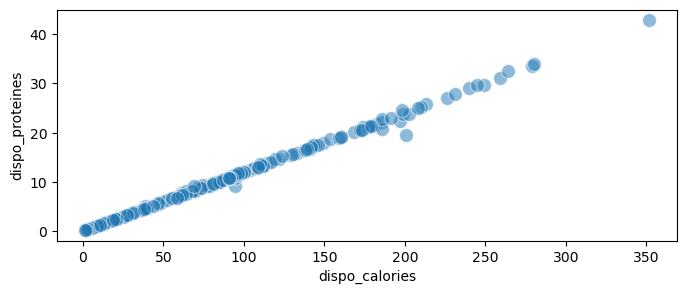

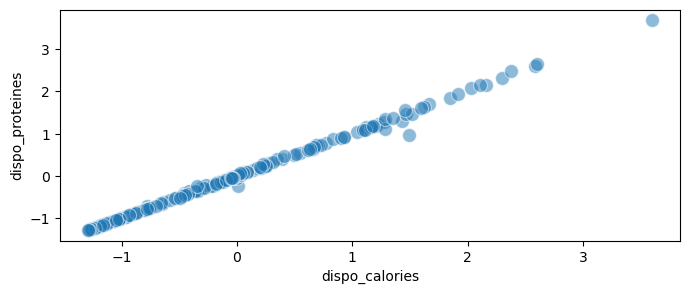

In [9]:
plt.figure(figsize=(8, 3))
sns.scatterplot(data=data, x='dispo_calories', y='dispo_proteines', s=100, alpha=.5)
plt.show()

plt.figure(figsize=(8, 3))
sns.scatterplot(data=data_norma, x='dispo_calories', y='dispo_proteines', s=100, alpha=.5)
plt.show()

### Classification ascendante hiérarchique avec un dendrogramme

Je réalise un clustering hiérarchique avec la création d'une matrice des liens selon la Méthode de Ward.
Ensuite j'affiche un premier dendrogramme avec une vue globale.

In [10]:
Z = linkage(X_scaled, method = 'ward', metric='euclidean')

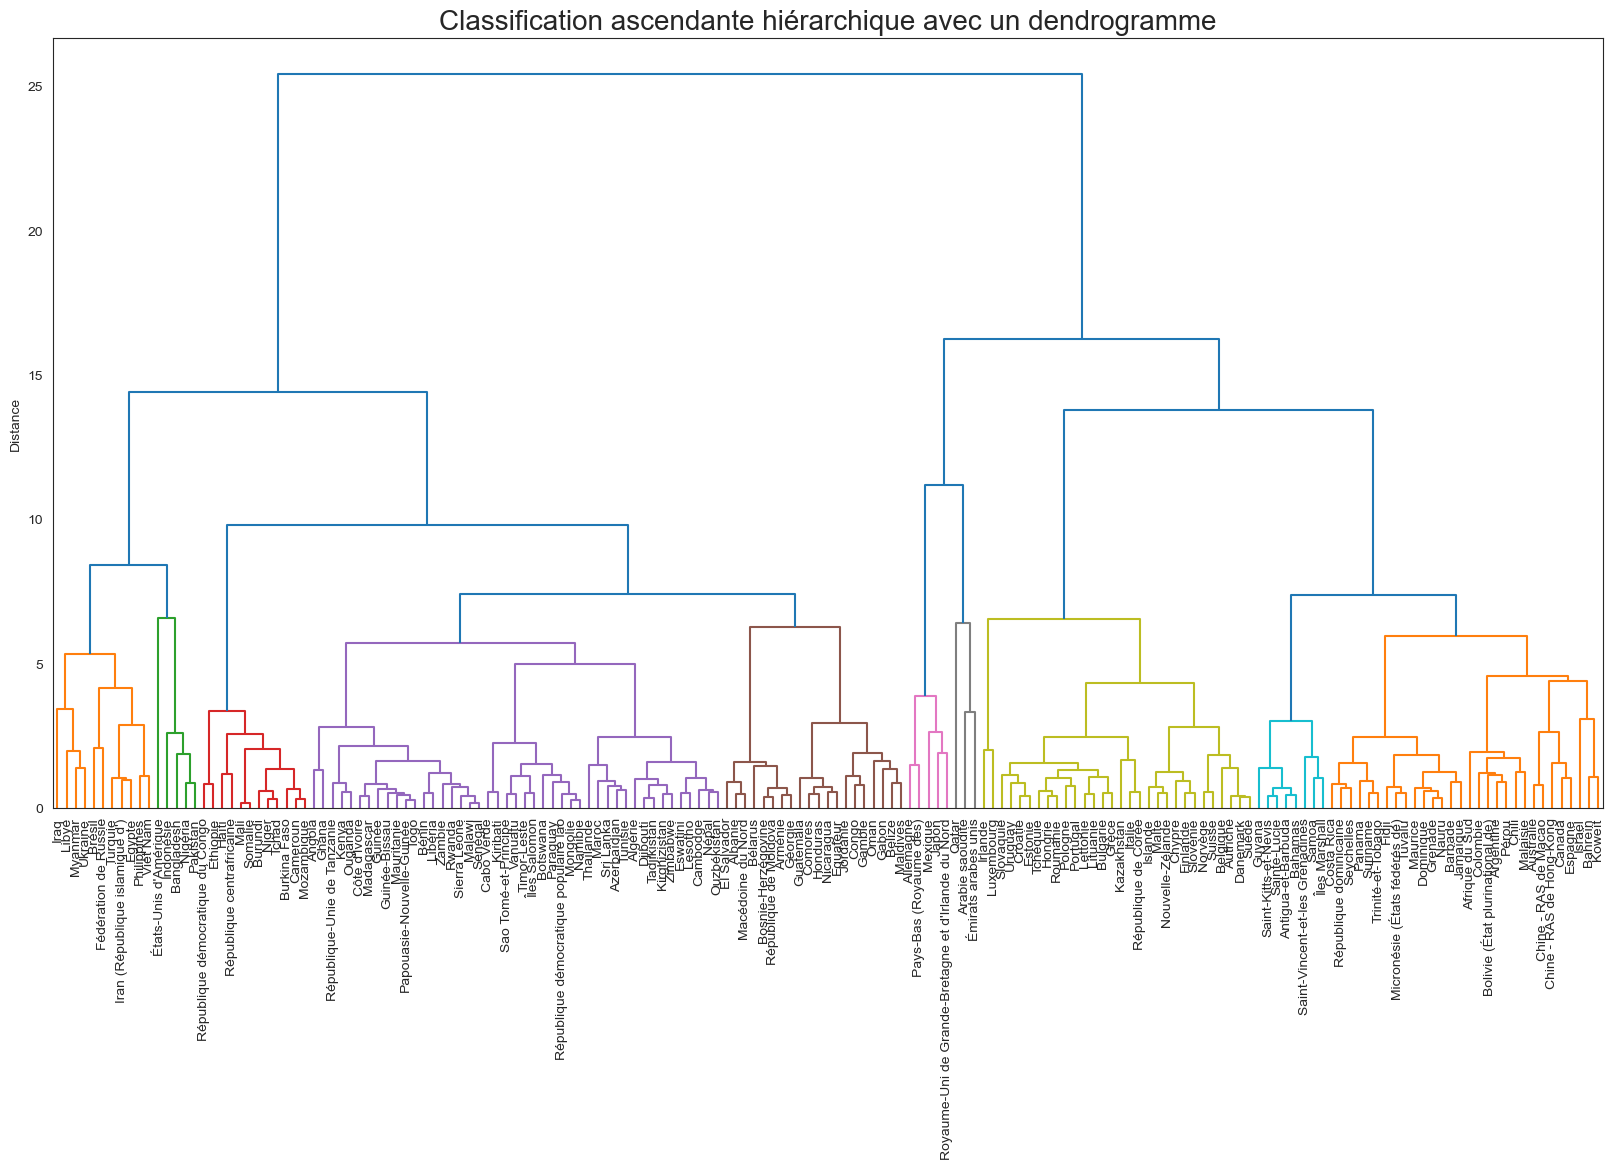

In [11]:
fig =plt.figure(figsize=(20,10))
sns.set_style('white')
plt.title('Classification ascendante hiérarchique avec un dendrogramme', fontsize=20)
plt.ylabel('Distance', fontsize=10)

dendrogram(Z, labels = data.index, leaf_font_size=10, color_threshold=7, orientation='top')
plt.show()

Pour me faire une première idée de partitionnement, je couple le dendrogramme en 5 groupes.

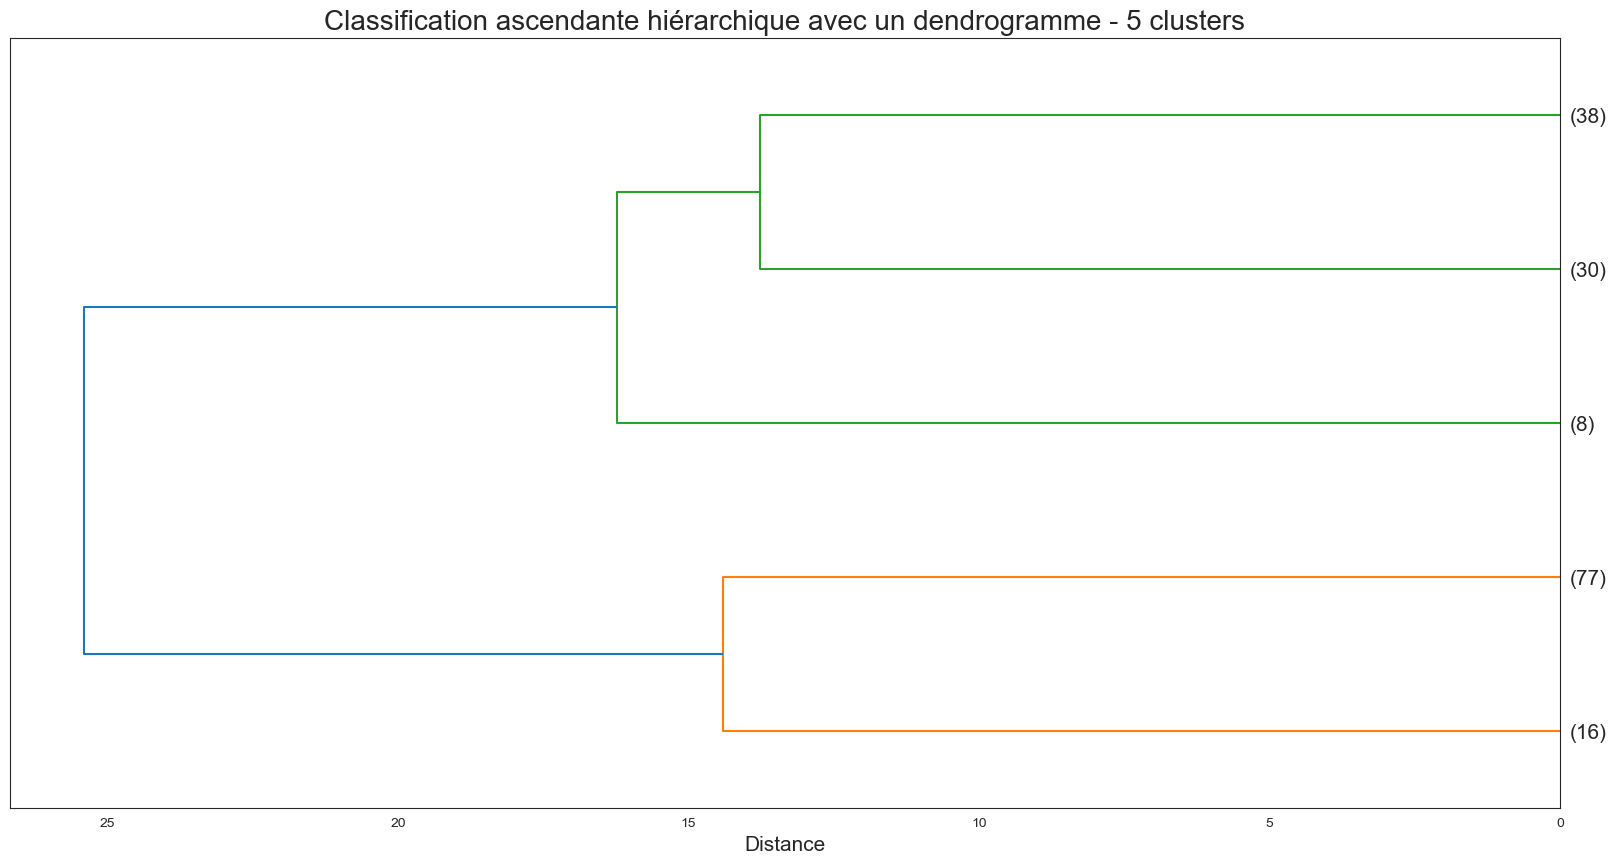

In [12]:
fig = plt.figure(figsize=(20,10))
plt.title('Classification ascendante hiérarchique avec un dendrogramme - 5 clusters', fontsize=20)
plt.xlabel('Distance', fontsize=15)

dendrogram(Z, labels = data.index, p=5, truncate_mode='lastp', leaf_font_size=15, orientation='left')
plt.show()

Création des groupes avec les pays associés à chaque groupes indexé.

Intégration des groupes dans notre dataframe de départ : "data".

In [13]:
groupes_cah = fcluster(Z, 5, criterion='maxclust')
print('Numérotation de nos groupes : ' + str(np.unique(groupes_cah)))

idg = np.argsort(groupes_cah)

df_pays_groupe = pd.DataFrame(data.index[idg], groupes_cah[idg]).reset_index()
df_pays_groupe = df_pays_groupe.rename(columns={'index':'Groupe'})

Numérotation de nos groupes : [1 2 3 4 5]


In [14]:
df_groupes_cah = pd.merge(data, df_pays_groupe, on='pays')

Préparation de sous-ensembles permettant de caractériser les groupes un à un

In [15]:
df_groupe1_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 1]
df_groupe2_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 2]
df_groupe3_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 3]
df_groupe4_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 4]
df_groupe5_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 5]

In [16]:
df_groupe1_cah

,pays,dispo_calories,dispo_proteines,population,pop_croissance,pib,politique,importation,Groupe
14,Bangladesh,6.66,0.73,171186.372,1.325040,7805.2,-1.09,0.0,1
21,Brésil,177.76,21.28,215313.498,1.224251,17874.3,-0.33,5.0,1
50,Fédération de Russie,129.38,15.43,144713.314,0.985485,38128.7,-0.92,52.0,1
64,Indonésie,56.01,6.67,275501.339,1.286954,13495.5,-0.44,0.0,1
65,Iran (République islamique d'),92.86,11.09,88550.570,1.351002,15499.9,-1.59,78.0,1
66,Iraq,62.19,7.42,44496.122,1.806666,13062.0,-2.47,470.0,1
81,Libye,130.70,15.62,6812.341,1.321555,14777.6,-2.20,105.0,1
99,Myanmar,47.30,5.42,54179.306,1.189752,5308.8,-2.21,1.0,1
104,Nigéria,6.14,0.73,218541.212,1.778899,5670.0,-1.80,0.0,1
111,Pakistan,31.74,3.79,235824.862,1.527661,5706.9,-1.90,0.0,1


Comparaison des moyennes des groupes afin d'identifier le groupe porteur.

In [17]:
df_groupes_cah.groupby('Groupe').mean()

C:\Users\dltja\AppData\Local\Temp\ipykernel_186776\3386134718.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_groupes_cah.groupby('Groupe').mean()


,dispo_calories,dispo_proteines,population,pop_croissance,pib,politique,importation
Groupe,,,,,,,
1,82.238750,9.817500,140199.233812,1.338674,18479.862500,-1.237500,105.875000
2,44.091688,5.285844,17042.777377,1.578872,8254.644156,-0.417792,32.636364
3,139.147500,16.661250,58555.460125,1.787378,61574.237500,0.438750,786.500000
4,90.428000,10.766333,10952.211800,1.094721,55974.656667,0.689333,79.400000
5,193.068684,23.027895,11129.067947,1.264268,27177.407895,0.503421,54.842105


Sur l'importation on constate que le groupe 3, 1 et 4 ce démarque.

Comparaison visuelle des groupes avec des boîte à moustache ; les numéros des groupes étant en abssices

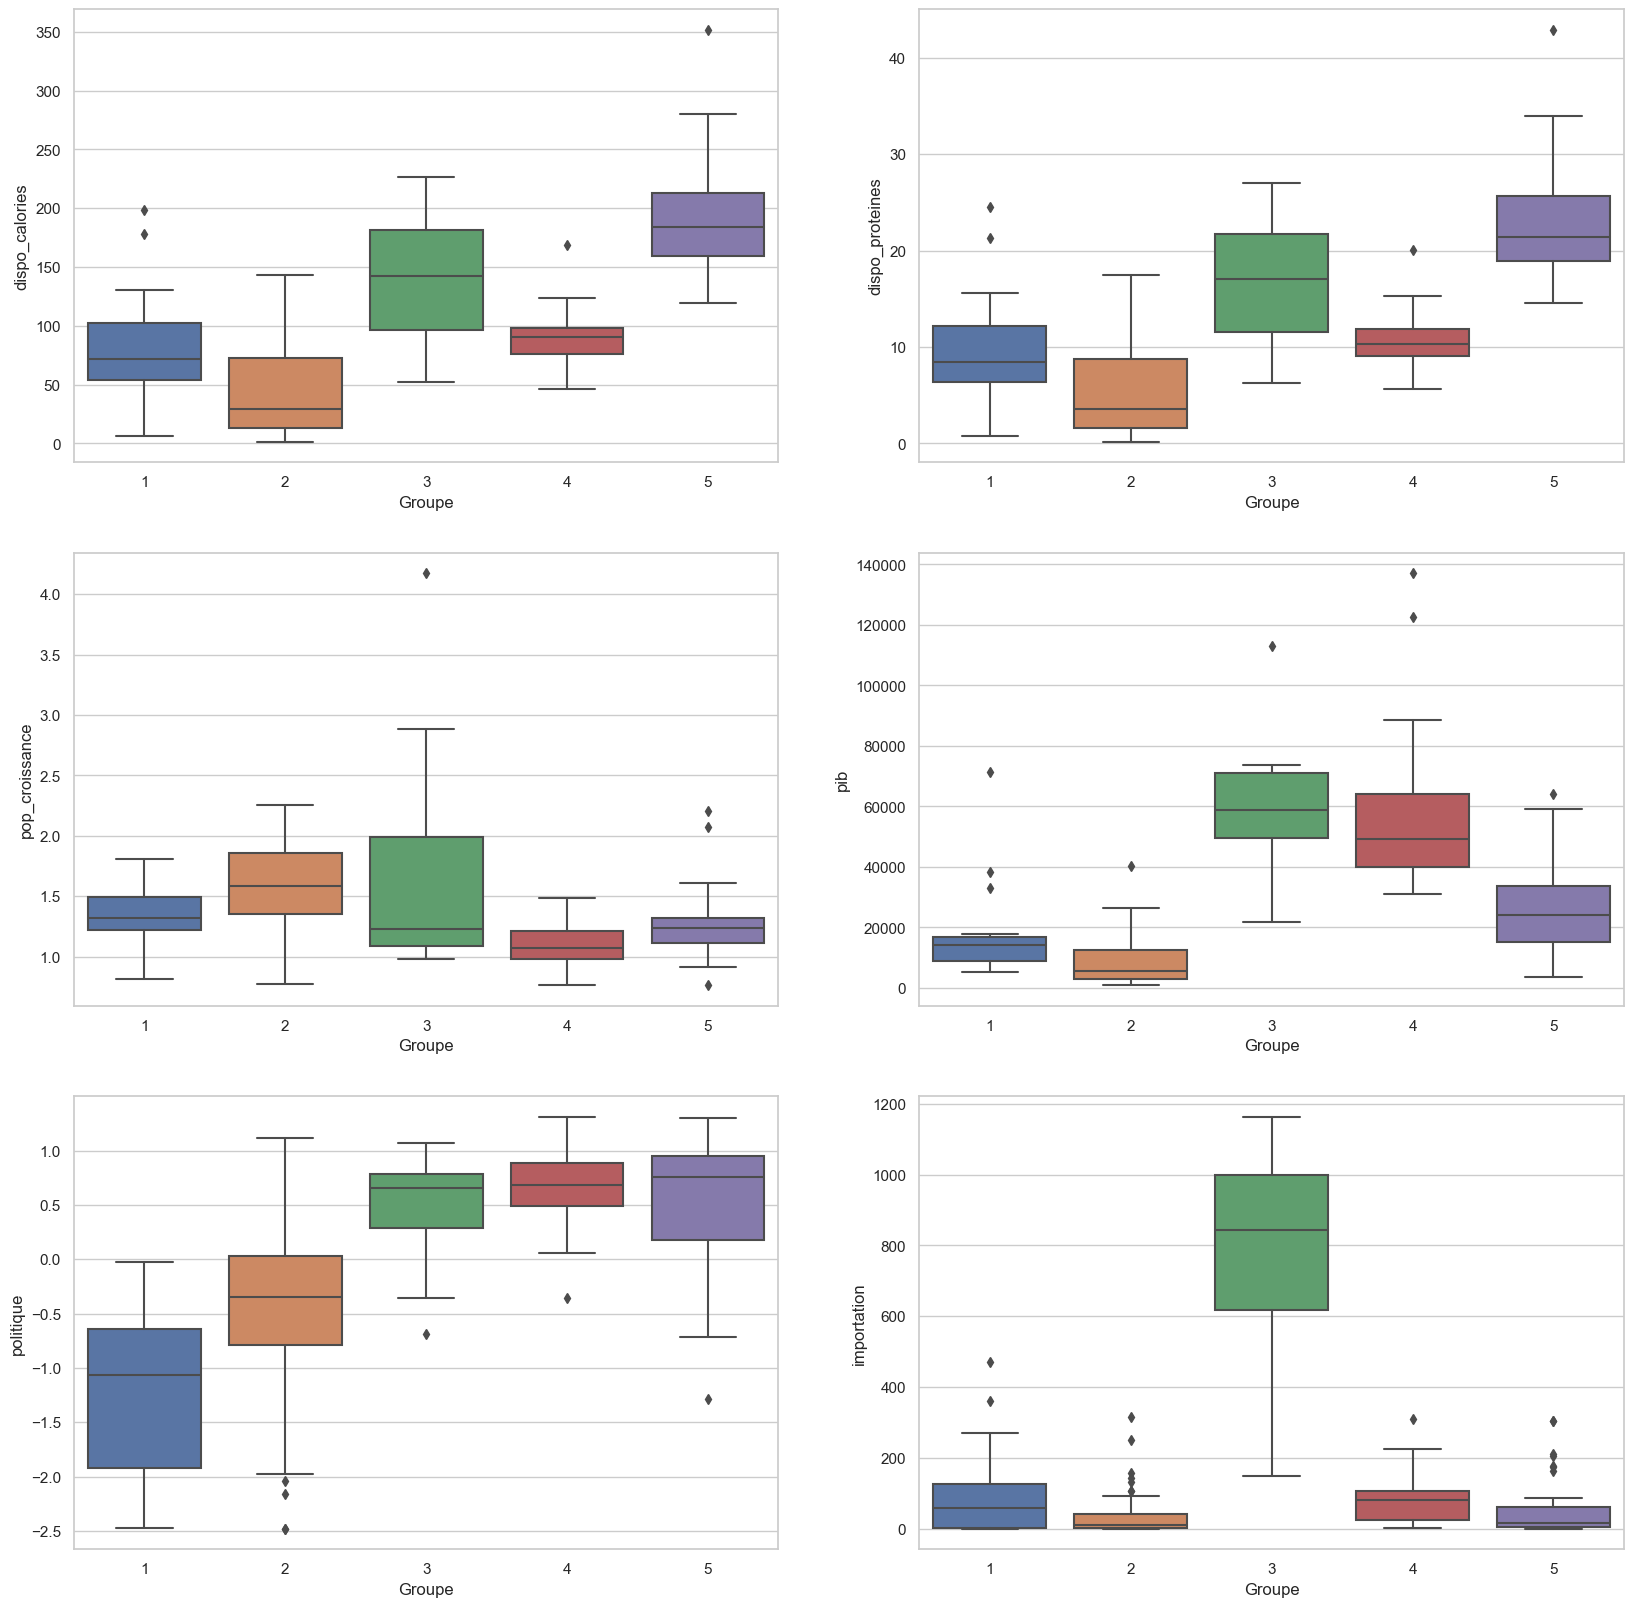

In [18]:
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(321)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='dispo_calories')

plt.subplot(322)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='dispo_proteines')

plt.subplot(323)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='pop_croissance')

plt.subplot(324)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='pib')

plt.subplot(325)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='politique')

plt.subplot(326)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='importation')

plt.show(block=False)

**Groupe 1 :** Il possède des disponibilités en protéine et calorique dans la moyenne basse, la croissance de la population est moyenne, le PIB est l'un des plus faible avec quelque outliers plus élévé, la stabilité la plus instable, enfin c'est des groupes avec une importation sur la volaille moyenne.
    
**Groupe 2 :** Il possède des disponibilités en protéine et calorique la plus faible, la croissance de la population est élévé, le PIB est le plus faible, la stabilité polique est l'une des plus instable, enfin c'est l'un des groupe avec la plus faible importation sur la volaille.

**Groupe 3 :** Il possède des disponibilités en protéine et calorique dans la moyenne haute, la croissance de la population est relativement élevé, le PIB est le plus élevé des 5 groupes, la stabilité polique est l'une des meilleurs, enfin c'est le groupe avec le plus d'importation sur la volaille et de loin.
    
**Groupe 4 :** Il possède des disponibilités en protéine et calorique moyen, la croissance de la population est la plus faible, le PIB est le deuxième plus élévé, la stabilité polique semble très variable, enfin c'est des groupes avec une importation sur la volaille moyenne.
    
**Groupe 5 :** Il possède des disponibilités en protéine et calorique les plus élevé, la croissance de la population est l'une des plus faible, le PIB est le troisième plus élevé, la stabilité polique semble bonne, enfin c'est l'un des groupe avec la plus faible importation sur la volaille.
    

Nous allons nous interesser au groupe 1, ainsique le 3, regroupe plusieurs aspect qui nous interesse dont : la consomation et l'importation !

In [19]:
print(df_groupe4_cah['pays'].unique())


['Autriche' 'Belgique' 'Bulgarie' 'Chypre' 'Croatie' 'Danemark' 'Estonie'
 'Finlande' 'Grèce' 'Hongrie' 'Irlande' 'Islande' 'Italie' 'Kazakhstan'
 'Lettonie' 'Lituanie' 'Luxembourg' 'Malte' 'Norvège' 'Nouvelle-Zélande'
 'Pologne' 'Portugal' 'Roumanie' 'République de Corée' 'Slovaquie'
 'Slovénie' 'Suisse' 'Suède' 'Tchéquie' 'Uruguay']


In [20]:
print(df_groupe3_cah['pays'].unique())


['Allemagne' 'Arabie saoudite' 'Japon' 'Mexique' 'Pays-Bas (Royaume des)'
 'Qatar' "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"
 'Émirats arabes unis']


### K-means

Je défini une liste vide pour sotcker nos inerties. Ensuite la liste du nombre de clusters que l'on veut tester.

In [21]:
intertia = []
k_list = range(1, 10)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

Pour chaque valeur de k, on entraine un k-means spécifique et on stocke son inertie. 

In [22]:
for i in k_list :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data_norma) 
  intertia.append(kmeans.inertia_)

C:\Users\dltja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dltja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dltja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dltja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

J'affiche ma liste des inerties. 

In [23]:
intertia

[1183.0000000000002,
 840.1911471488097,
 702.4237698510395,
 602.4524331135212,
 508.84484781715526,
 439.89340647096736,
 385.24080214125263,
 342.2779457456209,
 314.50197834938103]

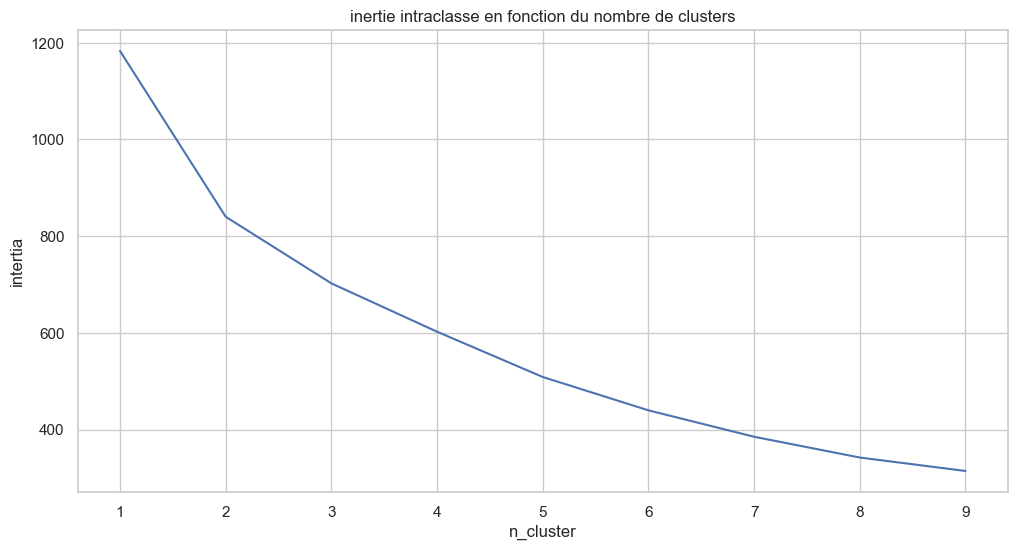

In [24]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_title("inertie intraclasse en fonction du nombre de clusters")
ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, intertia)

On constate une cassure nette et la plus loin au niveau du 5 ème cluster.

Cela correponds au nombre de cluster choisi pour le réalisation de ma classification ascendante hiérarchique à l'aide du dendrogramme. Je vais donc pouvoir comprarer les clusters entre eux.

Je commence par lancé mon algorithme k-means pour qu'il m'identifie 5 clusters.

In [25]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data_norma)

C:\Users\dltja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dltja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

Je sors les clusters

In [26]:
kmeans.labels_

array([2, 2, 1, 3, 1, 0, 3, 0, 1, 0, 2, 1, 0, 0, 4, 0, 2, 2, 0, 2, 1, 4,
       2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 1, 0,
       2, 2, 2, 1, 0, 2, 4, 0, 1, 1, 0, 2, 1, 1, 1, 0, 2, 1, 1, 2, 4, 1,
       1, 2, 2, 0, 2, 0, 3, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 2, 2, 2, 1, 0,
       1, 1, 1, 2, 1, 0, 1, 3, 0, 1, 1, 1, 1, 0, 1, 1, 4, 2, 2, 1, 2, 1,
       1, 4, 0, 1, 1, 3, 1, 2, 2, 0, 0, 2, 3, 1, 1, 2, 2, 2, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1,
       1, 0, 1, 2, 1, 1, 1, 1, 1, 3, 1, 4, 1, 0, 1])

Pour plus de lisibilité et ne pas confondre avec les clusters identifiées avec l'CAH, je préfère uilisé des lettres

In [27]:
dd = {i:j for i,j in enumerate(list("abcde"))}
dd

{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e'}

In [28]:
labels = [dd[i] for i in kmeans.labels_]
labels[:10]

['c', 'c', 'b', 'd', 'b', 'a', 'd', 'a', 'b', 'a']

J'affiche mes pays selon leurs clusters.

In [29]:
df_pays_cluster = pd.DataFrame(data.index, labels).reset_index()
df_pays_cluster = df_pays_cluster.rename(columns={'index':'cluster'})
df_pays_cluster

,cluster,pays
0,c,Afrique du Sud
1,c,Albanie
2,b,Algérie
3,d,Allemagne
4,b,Angola
...,...,...
164,b,Équateur
165,e,États-Unis d'Amérique
166,b,Éthiopie
167,a,Îles Marshall


Je réalise une jointure externe pour ajouter mes groupes dans mon dataframe de départ : "data". 

In [30]:
df_km_cluster = pd.merge(data, df_pays_cluster, on='pays')
df_km_cluster

,pays,dispo_calories,dispo_proteines,population,pop_croissance,pib,politique,importation,cluster
0,Afrique du Sud,149.24,17.86,59893.885,1.279421,14322.3,-0.72,304.0,c
1,Albanie,85.67,10.27,2842.321,0.893244,17261.0,0.11,47.0,c
2,Algérie,23.14,2.77,44903.225,1.459099,13090.9,-0.74,0.0,b
3,Allemagne,60.85,7.69,83369.843,1.022295,62605.5,0.61,789.0,d
4,Angola,39.62,4.75,35588.987,2.170846,7407.1,-0.65,316.0,b
...,...,...,...,...,...,...,...,...,...
164,Équateur,108.60,12.99,18001.000,1.425652,13530.4,-0.24,1.0,b
165,États-Unis d'Amérique,198.23,24.52,338289.857,1.197916,71308.9,-0.04,191.0,e
166,Éthiopie,1.49,0.18,123379.924,1.840616,2698.6,-2.04,0.0,b
167,Îles Marshall,280.32,33.92,41.569,0.766616,6625.5,1.06,3.0,a


Comparaison des moyennes par groupe pour potentiellement identifier un groupe qui se démarque, puis le nombre de pays dans chacun d'entre eux.

In [31]:
df_km_cluster.groupby('cluster').mean()

C:\Users\dltja\AppData\Local\Temp\ipykernel_186776\3086455385.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_km_cluster.groupby('cluster').mean()


,dispo_calories,dispo_proteines,population,pop_croissance,pib,politique,importation
cluster,,,,,,,
a,204.819687,24.444375,5834.549437,1.376947,27774.625000,0.577187,30.125000
b,39.876622,4.765811,25904.838230,1.608706,7550.285135,-0.625270,47.648649
c,99.502041,11.858367,12379.869224,1.135009,43855.612245,0.471837,83.346939
d,126.698571,15.190000,66535.508429,1.446657,54205.271429,0.364286,877.571429
e,86.560000,10.450000,228481.493429,1.332315,22855.642857,-0.931429,35.428571


In [32]:
df_km_cluster.groupby('cluster').count()

,pays,dispo_calories,dispo_proteines,population,pop_croissance,pib,politique,importation
cluster,,,,,,,,
a,32,32,32,32,32,32,32,32
b,74,74,74,74,74,74,74,74
c,49,49,49,49,49,49,49,49
d,7,7,7,7,7,7,7,7
e,7,7,7,7,7,7,7,7


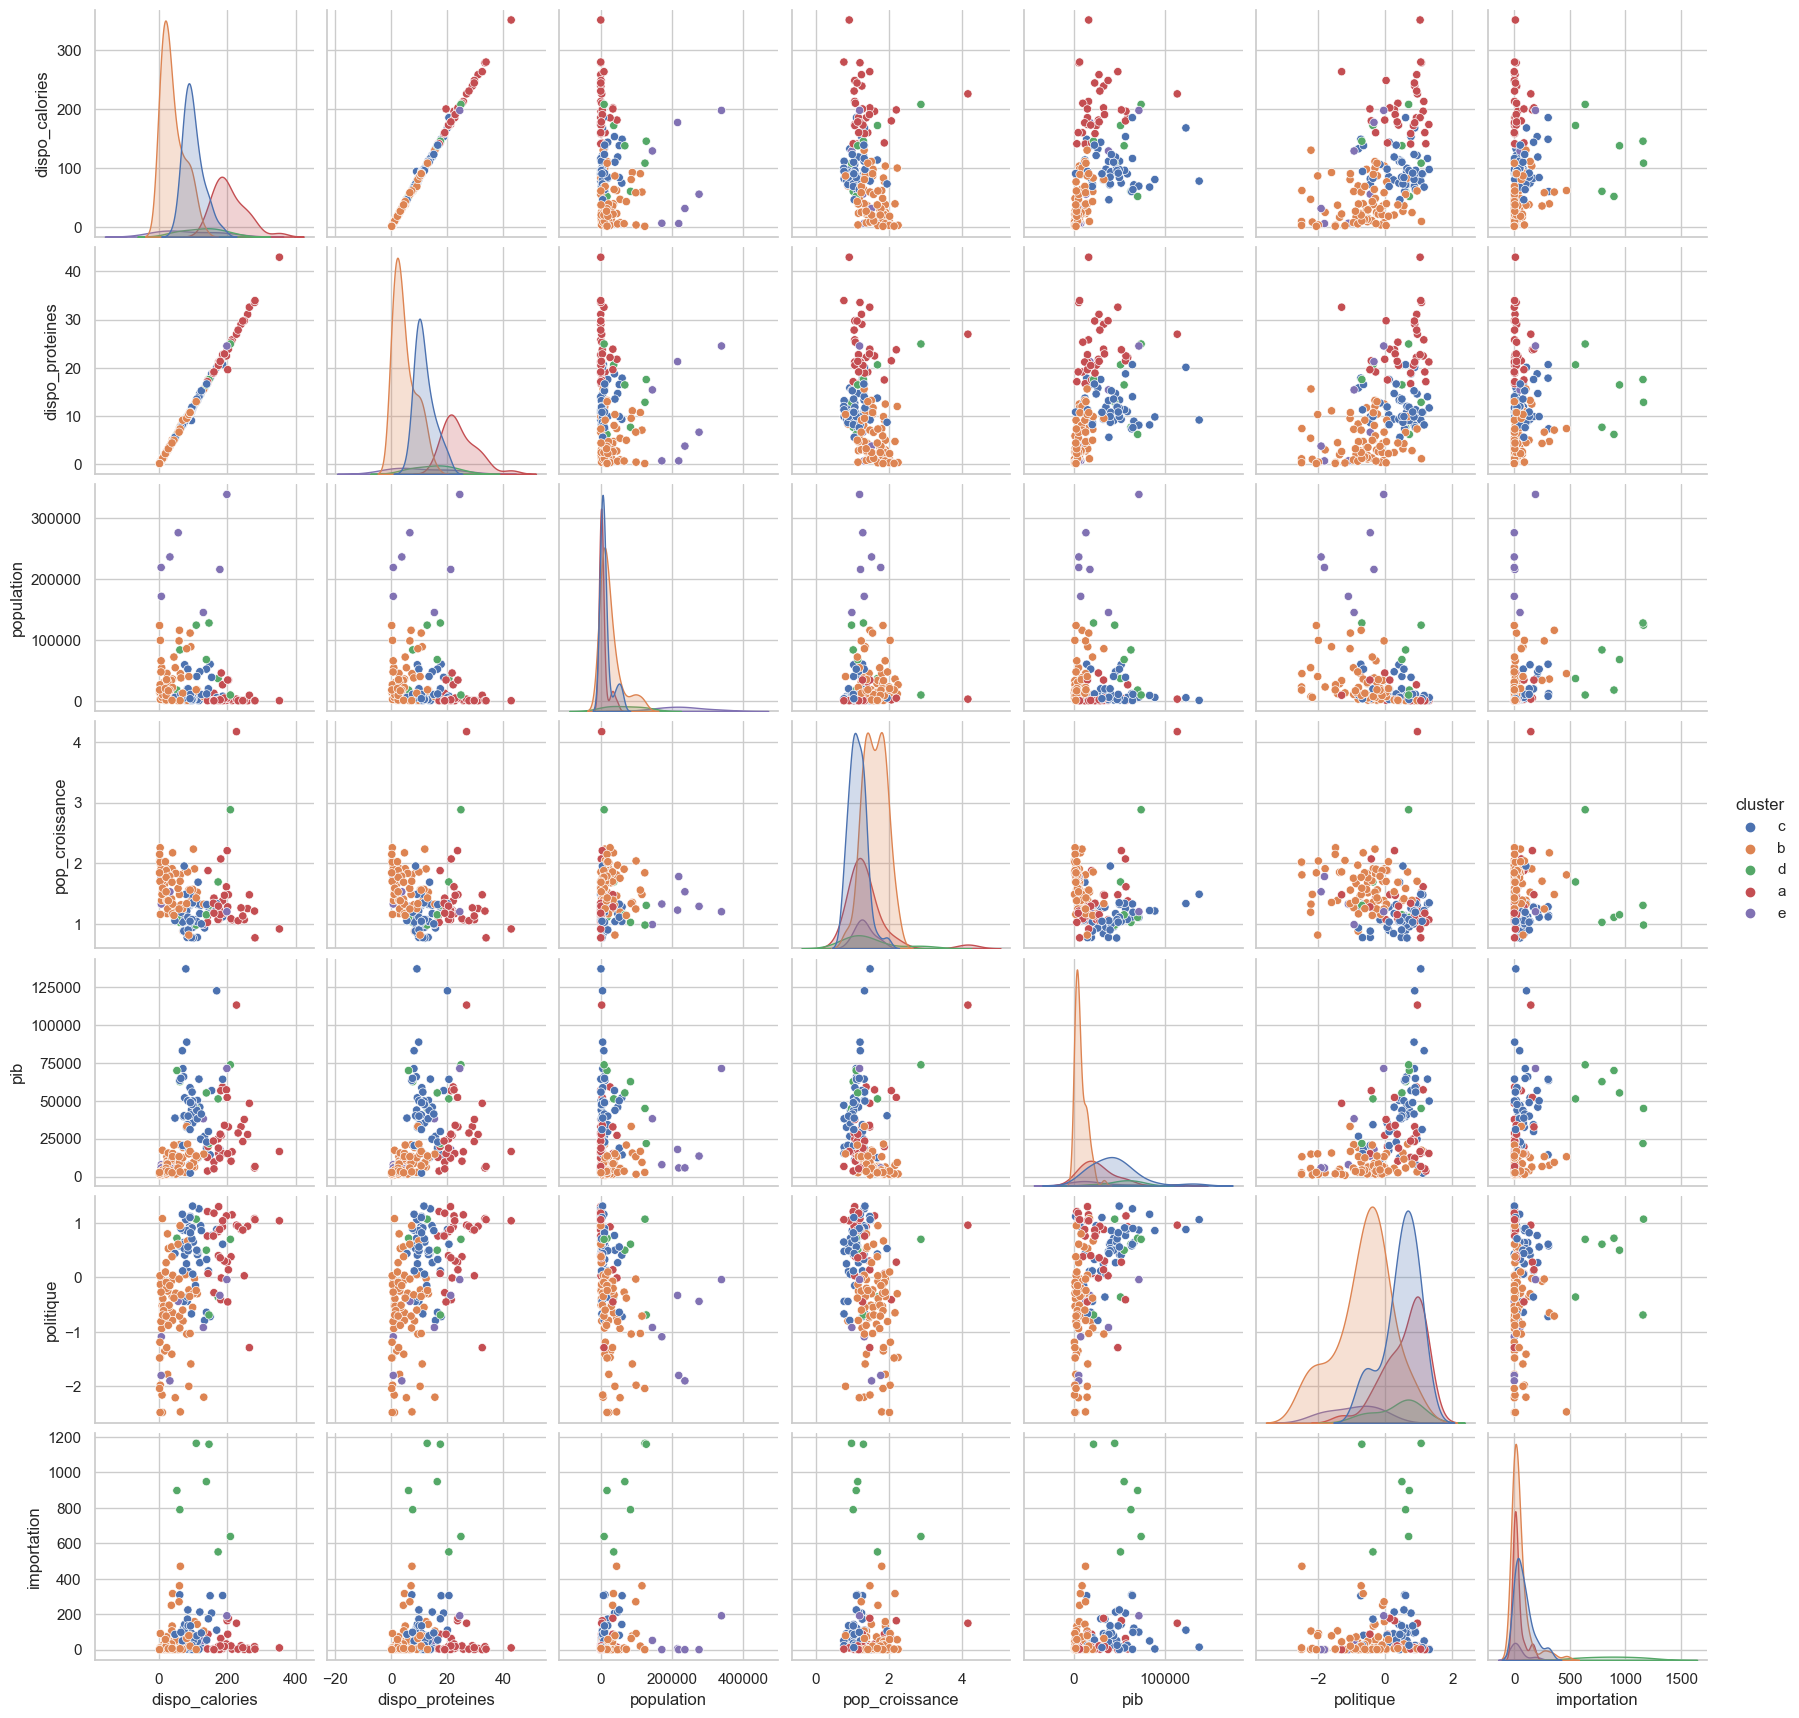

In [33]:
sns.pairplot(df_km_cluster, hue="cluster")

Ici aussi des groupes qui ce distingue.

On retrouve des groupes similaires à ceux identifier dans l'CAH :

    - le a est semblable au 5
    - le b est semblable au 2
    - le c est semblable au 4
    - le d est semblable au 3
    - le e est semblable au 1

Ensuite je réalise une carte thermique pour voir si certaine de mes varibles sont corrélés. Il faut les indentifier car elle pourrait biaisé mes résultats.

C:\Users\dltja\AppData\Local\Temp\ipykernel_186776\127390041.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_km_cluster.corr(), annot=True)


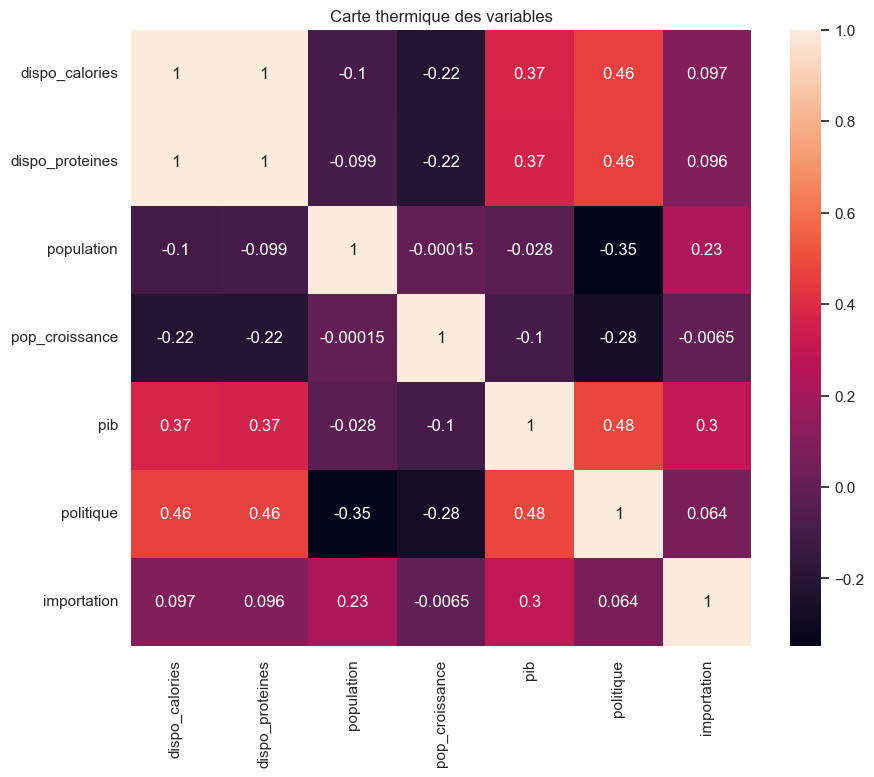

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_km_cluster.corr(), annot=True)
plt.title("Carte thermique des variables")
plt.show()


On constate directement que la dispo_calories et la dispo_proteines sont coorélées. Celle ci le sont aussi moyennement avec le PIB et la politique, qui elle même sont coorélé entre elles.

### ACP

Je vais réaliser une analyse en coomposantes principales sur mes données, pour avoir la variance globale de mes données.

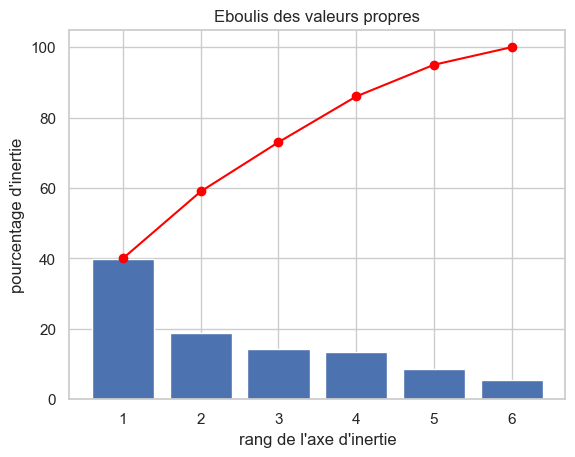

In [35]:
n_components = 6

pca = PCA(n_components=n_components)
pca.fit(X_scaled)

scree = (pca.explained_variance_ratio_*100).round(2)

scree_cum = scree.cumsum().round()

x_list = range(1, n_components+1)

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)



Les deux 1er composant représente 60 % d'inertie des données.

Les autres 5 autres composants principales représente 100% d'inertie, mais cela fait trop de dimentions.

Dans un 1er temps nous allons visualisé nos données sur les 2 premiers composants, on pourras obtenir une vue en 2D.
Ensuite dans un second temsp nous allons visualisé nos données sur les 3 premier compasants, soit 70 % d'inertie, on porras obtenir une vue en 3D.

Je créer un dataframe avec les informations contenue dans les différentes composantes principale en fonvtion de mes variables.

In [36]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
test = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6
0,0.536266,0.535813,-0.137649,-0.224132,0.377626,0.446018,0.120860
1,0.007970,0.008515,0.655775,0.060806,0.270208,-0.198195,0.673671
2,-0.336544,-0.339013,-0.443930,0.341693,0.477537,0.354922,0.322442
3,0.295034,0.295097,-0.064020,0.874893,-0.061157,-0.220193,-0.064121
4,-0.092464,-0.091297,0.463085,0.118339,0.563852,0.121849,-0.649528
5,0.057368,0.052060,-0.367946,-0.223320,0.484427,-0.756624,-0.039912


Je vais chercher mes nom de colonnes initiaux puis les rapatries dans le dataframe. Je renomme également mes composantes de de PC 1 à PC 6

In [37]:
features = data.columns
pcs.columns = features
pcs.index = [f"PC{i}" for i in x_list]
pcs.round(2)

,dispo_calories,dispo_proteines,population,pop_croissance,pib,politique,importation
PC1,0.54,0.54,-0.14,-0.22,0.38,0.45,0.12
PC2,0.01,0.01,0.66,0.06,0.27,-0.20,0.67
PC3,-0.34,-0.34,-0.44,0.34,0.48,0.35,0.32
PC4,0.30,0.30,-0.06,0.87,-0.06,-0.22,-0.06
PC5,-0.09,-0.09,0.46,0.12,0.56,0.12,-0.65
PC6,0.06,0.05,-0.37,-0.22,0.48,-0.76,-0.04


Pour une meilleur lisibilité je vais transposer mes colonnes et mes lignes.

In [38]:
pcs.T

,PC1,PC2,PC3,PC4,PC5,PC6
dispo_calories,0.536266,0.007970,-0.336544,0.295034,-0.092464,0.057368
dispo_proteines,0.535813,0.008515,-0.339013,0.295097,-0.091297,0.052060
population,-0.137649,0.655775,-0.443930,-0.064020,0.463085,-0.367946
pop_croissance,-0.224132,0.060806,0.341693,0.874893,0.118339,-0.223320
pib,0.377626,0.270208,0.477537,-0.061157,0.563852,0.484427
politique,0.446018,-0.198195,0.354922,-0.220193,0.121849,-0.756624
importation,0.120860,0.673671,0.322442,-0.064121,-0.649528,-0.039912


Je peux maintenant passer à l'affichage de mes cercle de coorélation qui vont me permettre de visulisé mes données.

In [39]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('PC{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('PC{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (PC{} et PC{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

Affichage de mes cercles de corrélation des 2 premier composants

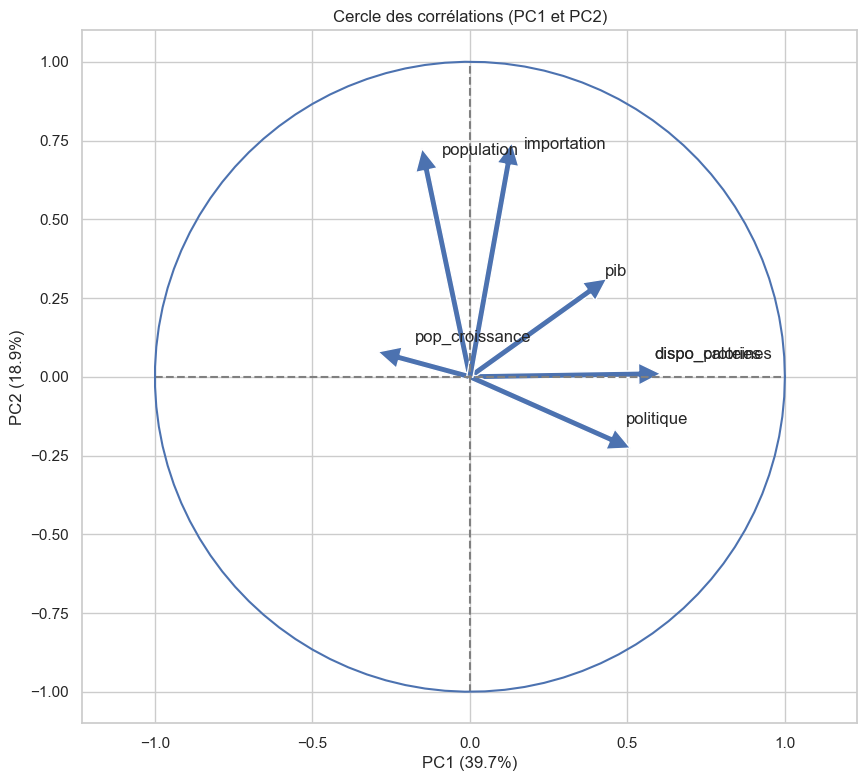

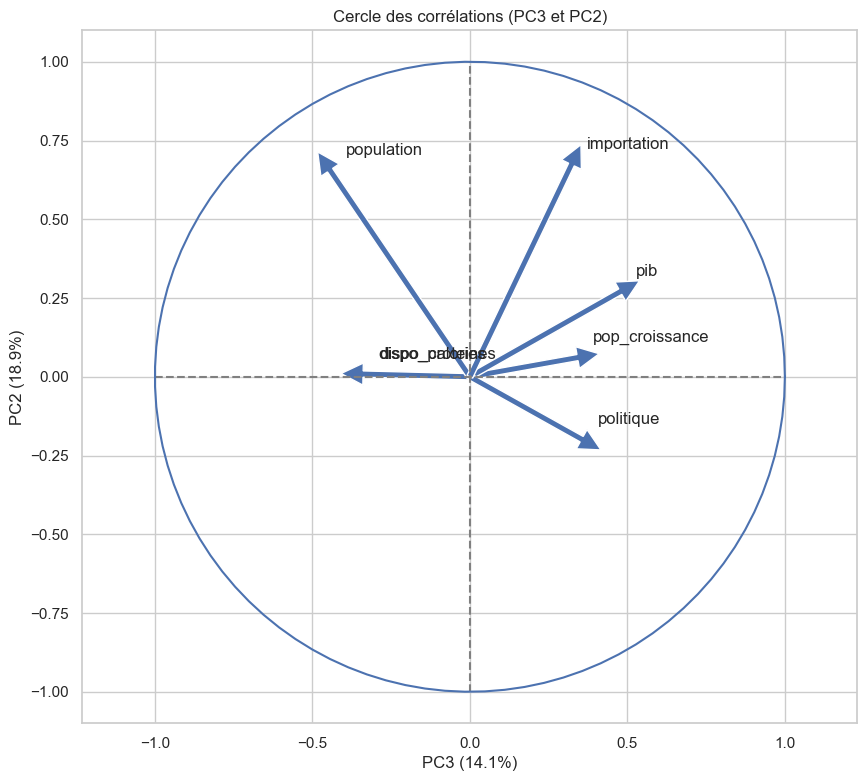

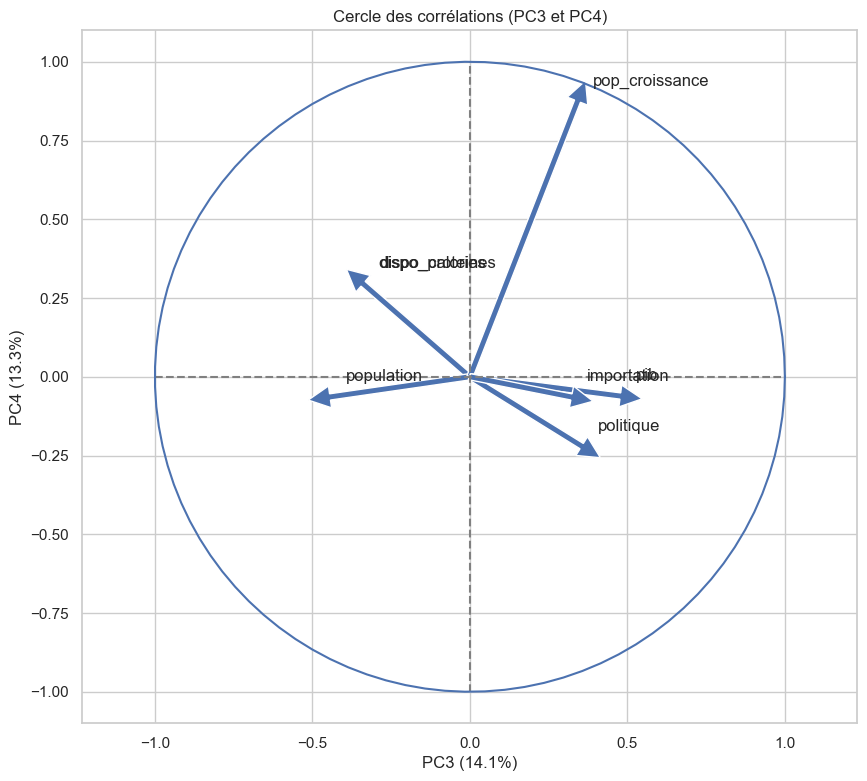

In [40]:
correlation_graph(pca, (0,1), features)
correlation_graph(pca, (2,1), features)
correlation_graph(pca, (2,3), features)

On constate que : 

    - PC 1 : est coorélé aux disponibilité, la politique et très faiblement le PIB.
    - PC 2 : est coorélé à la population, l'importation et très faiblement au PIB.
    - PC 3 : est coorélé au PIB, la politique et négativement légèrement à la population
    - PC 4 : est coorélé à la croissance de la population.

Je fait en sort que mon ACP soit projeté mes données normalisé par pays.

In [41]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[ 0.46595256,  1.2094482 , -0.98818566,  0.26386424, -0.95853984,
         0.23853742],
       [ 0.16128409, -0.66476637, -0.26384147, -1.09981592, -0.35150631,
         0.1738279 ],
       [-1.69699943, -0.0871904 , -0.08080065, -0.27445707,  0.30038312,
         0.1173695 ],
       [ 0.94616251,  3.43242191,  1.70463557, -1.61409327, -0.99543795,
        -0.19667142],
       [-1.63780466,  0.95165589,  0.88329301,  1.21643918, -0.84060011,
        -0.41649936]])

Avec mes composants principaux, je crée un dataframe. J'ajoute aussi le nom du pays ainsi que le groupe et le cluster définie grâce aux méthodes du CAH et du K-mean.

In [42]:
df_acp = pd.DataFrame(X_proj)
df_acp.columns = pcs.index
df_acp['pays'] = data.index
df_acp_cluster = pd.merge(df_acp, df_pays_cluster, on='pays')
df_acp_cluster = pd.merge(df_acp_cluster, df_pays_groupe, on='pays')
df_acp_cluster

,PC1,PC2,PC3,PC4,PC5,PC6,pays,cluster,Groupe
0,0.465953,1.209448,-0.988186,0.263864,-0.958540,0.238537,Afrique du Sud,c,5
1,0.161284,-0.664766,-0.263841,-1.099816,-0.351506,0.173828,Albanie,c,2
2,-1.696999,-0.087190,-0.080801,-0.274457,0.300383,0.117370,Algérie,b,2
3,0.946163,3.432422,1.704636,-1.614093,-0.995438,-0.196671,Allemagne,d,3
4,-1.637805,0.951656,0.883293,1.216439,-0.840600,-0.416499,Angola,b,2
...,...,...,...,...,...,...,...,...,...
164,-0.076836,-0.518525,-0.472346,0.270526,-0.097748,0.049852,Équateur,b,2
165,1.672193,4.850319,-2.793003,-0.089071,3.189065,-1.071912,États-Unis d'Amérique,e,1
166,-3.230660,1.140131,-0.962915,0.572892,0.761223,0.201523,Éthiopie,b,2
167,3.443344,-1.155595,-2.096794,0.068040,-0.876648,-0.432643,Îles Marshall,a,5


Dataframe de centroides des groupes du CAH 

In [43]:
df_centroide_groupe = df_acp_cluster.groupby('Groupe').mean()
df_centroide_groupe['pays'] = "centroide"
df_centroide_groupe['Groupe'] = "centroide"
df_centroide_groupe

C:\Users\dltja\AppData\Local\Temp\ipykernel_186776\1348987644.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_centroide_groupe = df_acp_cluster.groupby('Groupe').mean()


,PC1,PC2,PC3,PC4,PC5,PC6,pays,Groupe
Groupe,,,,,,,,
1,-1.103200,1.680056,-1.469499,-0.084078,0.668756,0.082536,centroide,centroide
2,-1.265419,-0.428902,0.148462,0.101163,-0.152536,-0.083318,centroide,centroide
3,1.654772,3.257801,1.719968,0.660987,-1.242341,-0.178043,centroide,centroide
4,0.996959,-0.118553,0.814798,-0.907791,0.614296,0.284126,centroide,centroide
5,1.893197,-0.430558,-0.687454,0.407934,-0.195921,-0.052751,centroide,centroide


Dataframe de centroides des groupes du K-mean 

In [44]:
df_centroide_cluster = df_acp_cluster.groupby('cluster').mean()
df_centroide_cluster['pays'] = "centroide"
df_centroide_cluster['cluster'] = "centroide"
df_centroide_cluster = df_centroide_cluster.drop('Groupe', axis = 1)
df_centroide_cluster

C:\Users\dltja\AppData\Local\Temp\ipykernel_186776\2244524741.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_centroide_cluster = df_acp_cluster.groupby('cluster').mean()


,PC1,PC2,PC3,PC4,PC5,PC6,pays,cluster
cluster,,,,,,,,
a,2.054017,-0.578120,-0.664370,0.731652,-0.133747,-0.100244,centroide,centroide
b,-1.472112,-0.220307,0.066628,0.163035,-0.148918,-0.013029,centroide,centroide
c,0.818498,-0.162995,0.436691,-0.670678,0.296036,0.210135,centroide,centroide
d,1.536924,3.571719,1.479501,-0.144160,-1.726104,-0.177543,centroide,centroide
e,-1.093875,2.541039,-2.203573,-0.229309,1.839545,-0.697406,centroide,centroide


Je fait des dataframe avec les composantes principales, j'ajoute les clusters de chaque méthodes et les centroides de celle ci.

In [45]:
df_cah_groupe_acp = df_acp_cluster.drop('cluster', axis=1)
df_cah_groupe_acp = pd.concat([df_cah_groupe_acp, df_centroide_groupe])
df_cah_groupe_acp

,PC1,PC2,PC3,PC4,PC5,PC6,pays,Groupe
0,0.465953,1.209448,-0.988186,0.263864,-0.958540,0.238537,Afrique du Sud,5
1,0.161284,-0.664766,-0.263841,-1.099816,-0.351506,0.173828,Albanie,2
2,-1.696999,-0.087190,-0.080801,-0.274457,0.300383,0.117370,Algérie,2
3,0.946163,3.432422,1.704636,-1.614093,-0.995438,-0.196671,Allemagne,3
4,-1.637805,0.951656,0.883293,1.216439,-0.840600,-0.416499,Angola,2
...,...,...,...,...,...,...,...,...
1,-1.103200,1.680056,-1.469499,-0.084078,0.668756,0.082536,centroide,centroide
2,-1.265419,-0.428902,0.148462,0.101163,-0.152536,-0.083318,centroide,centroide
3,1.654772,3.257801,1.719968,0.660987,-1.242341,-0.178043,centroide,centroide
4,0.996959,-0.118553,0.814798,-0.907791,0.614296,0.284126,centroide,centroide


In [46]:
df_km_cluster_acp = df_acp_cluster.drop('Groupe', axis=1)
df_km_cluster_acp = pd.concat([df_km_cluster_acp, df_centroide_cluster])
df_km_cluster_acp

,PC1,PC2,PC3,PC4,PC5,PC6,pays,cluster
0,0.465953,1.209448,-0.988186,0.263864,-0.958540,0.238537,Afrique du Sud,c
1,0.161284,-0.664766,-0.263841,-1.099816,-0.351506,0.173828,Albanie,c
2,-1.696999,-0.087190,-0.080801,-0.274457,0.300383,0.117370,Algérie,b
3,0.946163,3.432422,1.704636,-1.614093,-0.995438,-0.196671,Allemagne,d
4,-1.637805,0.951656,0.883293,1.216439,-0.840600,-0.416499,Angola,b
...,...,...,...,...,...,...,...,...
a,2.054017,-0.578120,-0.664370,0.731652,-0.133747,-0.100244,centroide,centroide
b,-1.472112,-0.220307,0.066628,0.163035,-0.148918,-0.013029,centroide,centroide
c,0.818498,-0.162995,0.436691,-0.670678,0.296036,0.210135,centroide,centroide
d,1.536924,3.571719,1.479501,-0.144160,-1.726104,-0.177543,centroide,centroide


J'affiche les différents point pays avec les centroïdes avec leurs clusteurs pour les deux méthodes utilisé.

In [47]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, palette = 'Paired')
    
    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'PC{x+1} {v1}')
    ax.set_ylabel(f'PC{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur PC{x+1} et PC{y+1})")
    plt.show()

Affichage du clustering du CAH

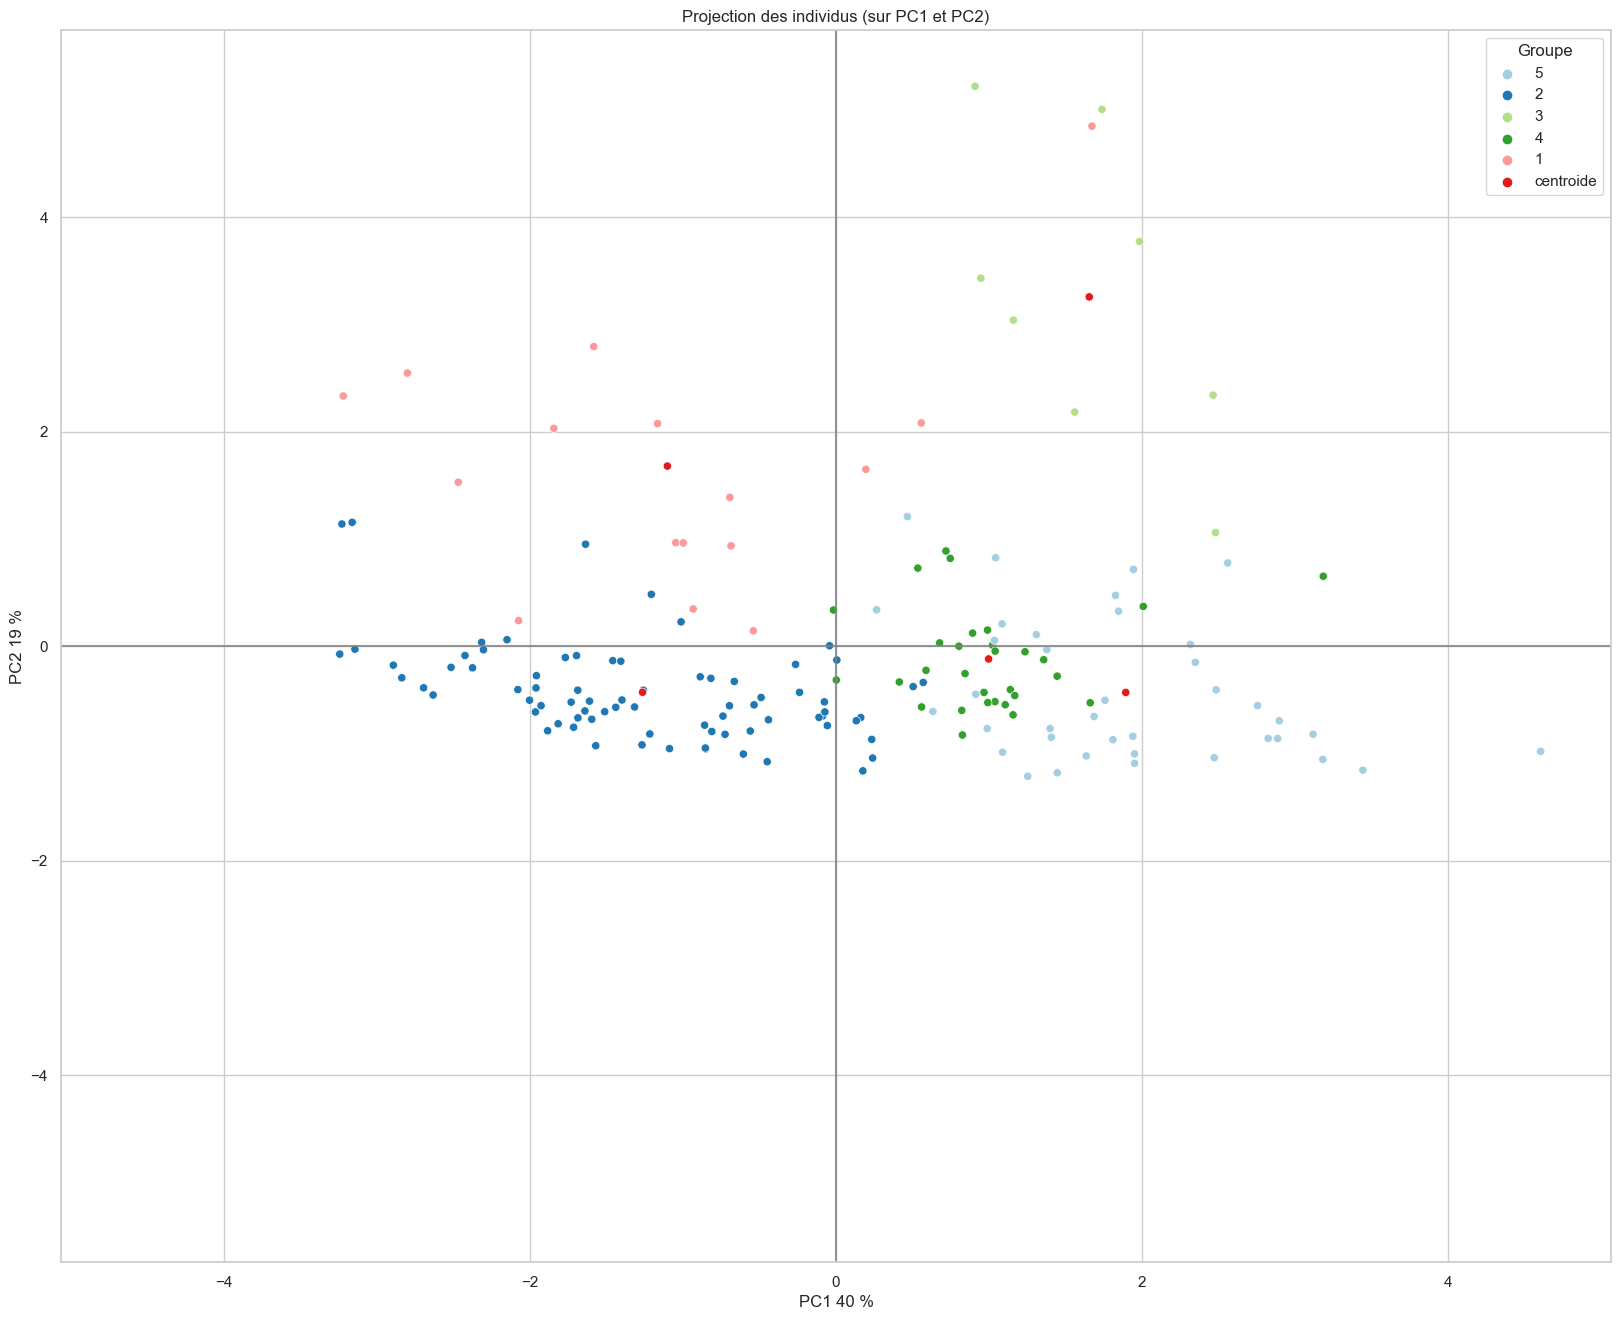

In [48]:
x_y = [0,1]
display_factorial_planes(df_cah_groupe_acp, x_y, pca, figsize=(20,16), clusters=df_cah_groupe_acp.Groupe, marker="o")

Affichage du clustering du K-mean

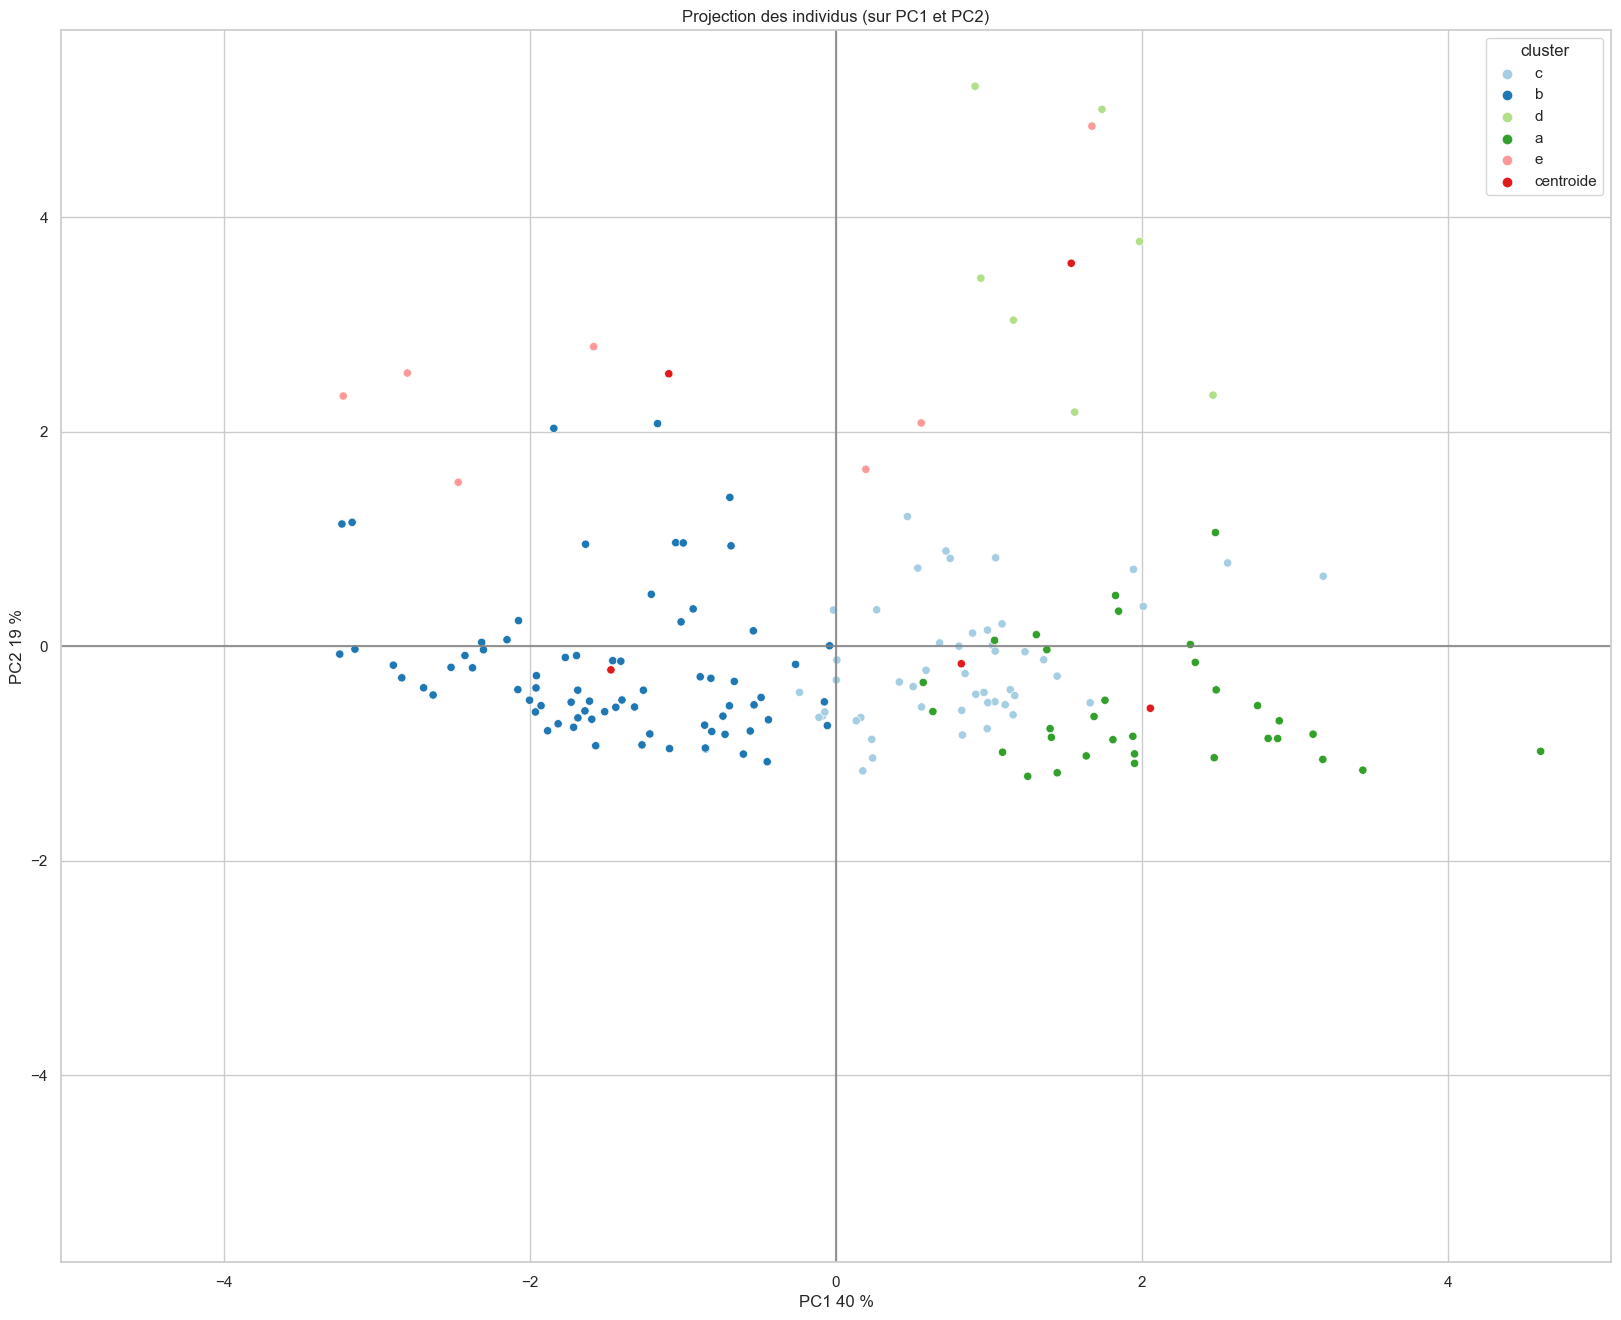

In [49]:
x_y = [0,1]
display_factorial_planes(df_km_cluster_acp, x_y, pca, figsize=(20,16), clusters=df_km_cluster_acp.cluster, marker="o")

On remarque bien que blobalement les cluster sont globalement les mêmes d'une méthodes à une autre.

In [50]:
pays_dev_CAH1 = df_cah_groupe_acp.loc[df_cah_groupe_acp['Groupe'] == 3, 'pays'].unique()
pays_dev_KM1 = df_km_cluster_acp.loc[df_km_cluster_acp['cluster'] == "d", 'pays'].unique()

In [51]:
pays_dev_CAH2 = df_cah_groupe_acp.loc[df_cah_groupe_acp['Groupe'] == 4, 'pays'].unique()
pays_dev_KM2 = df_km_cluster_acp.loc[df_km_cluster_acp['cluster'] == "c", 'pays'].unique()

J'affiche la liste des pays qui devrait être ciblé pour le développement à l'international.

In [52]:
common_elements1 = np.intersect1d(pays_dev_CAH1, pays_dev_KM1)
common_elements2 = np.intersect1d(pays_dev_CAH2, pays_dev_KM2)

print("Les pays a ciblé en priorité sont :","\n".join(common_elements1.tolist()))
print("\n")
print("Les pays a ciblé dans un second temps seront :","\n".join(common_elements2.tolist()))

Les pays a ciblé en priorité sont : Allemagne
Arabie saoudite
Japon
Mexique
Pays-Bas (Royaume des)
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord
Émirats arabes unis


Les pays a ciblé dans un second temps seront : Autriche
Belgique
Bulgarie
Chypre
Croatie
Danemark
Estonie
Finlande
Grèce
Hongrie
Irlande
Islande
Italie
Kazakhstan
Lettonie
Lituanie
Luxembourg
Malte
Norvège
Nouvelle-Zélande
Pologne
Portugal
Roumanie
République de Corée
Slovaquie
Slovénie
Suisse
Suède
Tchéquie
Uruguay


Maintenant je peux afficher ma vu en 3d

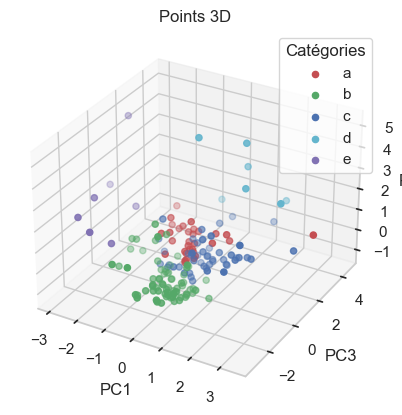

In [53]:
oui = df_km_cluster_acp['cluster'][df_km_cluster_acp['cluster'] != "centroide"]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  

categories = {'a': 'r', 'b': 'g', 'c': 'b', 'd': 'c', 'e': 'm'}
for cat, color in categories.items():
    mask = (oui == cat) 
    ax.scatter(X_proj[mask, 2], X_proj[mask, 0], X_proj[mask, 1], 
               c=color, label= cat)
plt.title("Points 3D")
ax.set_xlabel("PC1")
ax.set_ylabel("PC3")
ax.set_zlabel("PC2")

ax.legend(title="Catégories")
plt.show()
